In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Cross-sectional models and methods. The API focuses on models and the most frequently used statistical test, and tools.
from statsmodels.graphics.api import abline_plot # What does this do? Plot a line given an intercept and slope.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? APIs for evaluating the quality of a model’s predictions
from sklearn.model_selection import train_test_split #  What does this do? Split arrays or matrices into random train and test subsets.
from sklearn import linear_model, preprocessing # What does this do? Set of methods intended for regression in which the target value is expected to be a linear combination of the features. Common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

In [2]:
df = pd.read_csv("data/US_revenue_cleaned.csv")
print(df)

   Unnamed: 0  Year  Revenue_disney  Revenue_netflix  Revenue_hulu  \
0           0  2023           8.400            33.70          11.2   
1           1  2022           7.400            31.60          10.7   
2           2  2021           5.200            29.60           9.6   
3           3  2020           2.802            24.72           7.2   
4           4  2019           0.000            19.83           4.5   
5           5  2018           0.000            15.39           3.5   
6           6  2017           0.000            11.60           3.1   
7           7  2016           0.000             8.80           2.4   

   Revenue_twitch  Revenue_youtube  Revenue_tiktok  Subscribers_youtube  \
0             2.8           86.000          13.200               2700.0   
1             2.8           29.243           9.400               2600.0   
2             2.7           28.845           4.600               2500.0   
3             2.3           19.772           1.900               2300

In [3]:
df.describe()

,Unnamed: 0,Year,Revenue_disney,Revenue_netflix,Revenue_hulu,Revenue_twitch,Revenue_youtube,Revenue_tiktok,Subscribers_youtube,Subscribers_twitch,Subscribers_tiktok,Subscribers_netflix,Subscribers_hulu,Subscribers_disney,Subscribers_prime,Revenue_prime
count,8.00000,8.00000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0000
mean,3.50000,2019.50000,2.97525,21.905000,6.525000,1.687500,25.613625,3.707875,2100.000000,1.631250,0.654000,164.325000,32.150000,227.487500,140.625000,209.8750
std,2.44949,2.44949,3.57360,9.448637,3.609412,1.115396,25.881209,5.036045,501.426536,0.829431,0.611774,59.162627,13.581816,274.156761,69.114682,100.5008
min,0.00000,2016.00000,0.00000,8.800000,2.400000,0.100000,6.700000,0.000000,1400.000000,0.610000,0.000000,79.900000,12.000000,0.000000,46.000000,80.0000
25%,1.75000,2017.75000,0.00000,14.442500,3.400000,0.775000,10.350000,0.128250,1725.000000,0.987500,0.116000,117.975000,23.000000,0.000000,91.500000,132.2500
50%,3.50000,2019.50000,1.40100,22.275000,5.850000,1.900000,17.460500,1.125000,2150.000000,1.575000,0.540500,172.200000,33.500000,94.950000,135.000000,203.0000
75%,5.25000,2021.25000,5.75000,30.100000,9.875000,2.725000,28.944500,5.800000,2525.000000,2.235000,1.091500,211.750000,43.500000,471.000000,203.250000,288.0000
max,7.00000,2023.00000,8.40000,33.700000,11.200000,2.800000,86.000000,13.200000,2700.000000,2.780000,1.587000,238.000000,48.200000,614.000000,230.000000,352.0000


In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Revenue_disney', 'Revenue_netflix',
       'Revenue_hulu', 'Revenue_twitch', 'Revenue_youtube', 'Revenue_tiktok',
       'Subscribers_youtube', 'Subscribers_twitch', 'Subscribers_tiktok',
       'Subscribers_netflix', 'Subscribers_hulu', 'Subscribers_disney',
       'Subscribers_prime', 'Revenue_prime'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8 non-null      int64  
 1   Year                 8 non-null      int64  
 2   Revenue_disney       8 non-null      float64
 3   Revenue_netflix      8 non-null      float64
 4   Revenue_hulu         8 non-null      float64
 5   Revenue_twitch       8 non-null      float64
 6   Revenue_youtube      8 non-null      float64
 7   Revenue_tiktok       8 non-null      float64
 8   Subscribers_youtube  8 non-null      float64
 9   Subscribers_twitch   8 non-null      float64
 10  Subscribers_tiktok   8 non-null      float64
 11  Subscribers_netflix  8 non-null      float64
 12  Subscribers_hulu     8 non-null      float64
 13  Subscribers_disney   8 non-null      float64
 14  Subscribers_prime    8 non-null      int64  
 15  Revenue_prime        8 non-null      int64  

In [6]:
df = df.drop("Unnamed: 0", axis = 1)

In [7]:
df.head()

,Year,Revenue_disney,Revenue_netflix,Revenue_hulu,Revenue_twitch,Revenue_youtube,Revenue_tiktok,Subscribers_youtube,Subscribers_twitch,Subscribers_tiktok,Subscribers_netflix,Subscribers_hulu,Subscribers_disney,Subscribers_prime,Revenue_prime
0,2023,8.400,33.70,11.2,2.8,86.000,13.20,2700.0,1.89,1.587,238.0,48.2,614.0,230,352
1,2022,7.400,31.60,10.7,2.8,29.243,9.40,2600.0,2.58,1.366,220.0,45.0,582.0,213,315
2,2021,5.200,29.60,9.6,2.7,28.845,4.60,2500.0,2.78,1.000,209.0,43.0,434.0,200,279
3,2020,2.802,24.72,7.2,2.3,19.772,1.90,2300.0,2.12,0.700,192.9,39.0,189.9,150,236
4,2019,0.000,19.83,4.5,1.5,15.149,0.35,2000.0,1.26,0.381,151.5,28.0,0.0,120,170


In [8]:
df.dtypes

Year                     int64
Revenue_disney         float64
Revenue_netflix        float64
Revenue_hulu           float64
Revenue_twitch         float64
Revenue_youtube        float64
Revenue_tiktok         float64
Subscribers_youtube    float64
Subscribers_twitch     float64
Subscribers_tiktok     float64
Subscribers_netflix    float64
Subscribers_hulu       float64
Subscribers_disney     float64
Subscribers_prime        int64
Revenue_prime            int64
dtype: object

In [20]:
df_T = df.transpose()

In [21]:
df_T = df_T.reset_index()


In [22]:
df_T.columns = df_T.iloc[0]

In [24]:
df_T = df_T.drop(0)

In [41]:
df_T.head()

,company data,2023,2022,2021,2020,2019,2018,2017,2016
1,Revenue_disney,8.4,7.400,5.200,2.802,0.000,0.00,0.0,0.0
2,Revenue_netflix,33.7,31.600,29.600,24.720,19.830,15.39,11.6,8.8
3,Revenue_hulu,11.2,10.700,9.600,7.200,4.500,3.50,3.1,2.4
4,Revenue_twitch,2.8,2.800,2.700,2.300,1.500,0.90,0.4,0.1
5,Revenue_youtube,86.0,29.243,28.845,19.772,15.149,11.10,8.1,6.7


In [25]:
df_T.columns


Index(['Year', 2023.0, 2022.0, 2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0], dtype='object', name=0)

In [26]:
df_T.columns = df_T.columns.map(str)



In [27]:
df_T = df_T.rename(columns={'2023.0':'2023','2022.0':'2022','2021.0':'2021','2020.0':'2020','2019.0':'2019','2018.0':'2018','2017.0':'2017','2016.0':'2016'})

In [37]:
df_T_clean = df_T_clean.rename(columns={'Revenue($)/Subscribers(count)':'($)/(count)'})

In [31]:
df_T_clean = pd.melt(df_T,id_vars= ['company data'])
df_T_clean = df_T_clean.rename(columns={0:'Year', 'value': 'Revenue($)/Subscribers(count)'})

In [34]:
df_T_clean['type'] = df_T_clean['company data'].str.split('_').str[0]
df_T_clean['company'] = df_T_clean['company data'].str.split('_').str[1]


In [39]:
df_T_clean = df_T_clean.drop('company data', axis = 1)

In [42]:
df_T_clean.head()

,Year,($)/(count),type,company
0,2023,8.4,Revenue,disney
1,2023,33.7,Revenue,netflix
2,2023,11.2,Revenue,hulu
3,2023,2.8,Revenue,twitch
4,2023,86.0,Revenue,youtube


In [43]:
df_T_revenue = df_T_clean[df_T_clean['type'] == 'Revenue']
df_T_sub = df_T_clean[df_T_clean['type'] == 'Subscribers']

/Users/avinash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


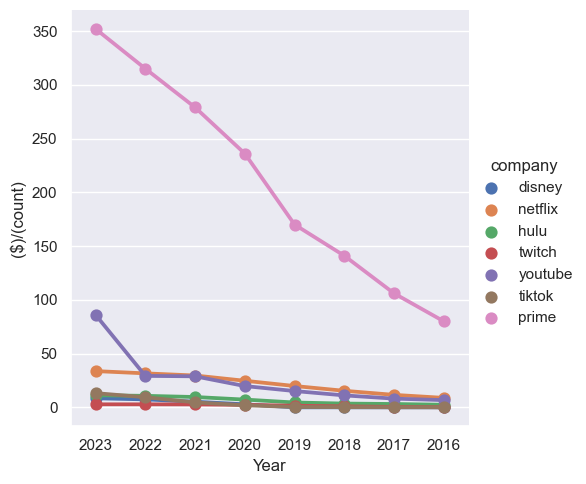

In [63]:
sns.catplot(x="Year",y="($)/(count)",kind="point",data=df_T_revenue, hue="company")


/Users/avinash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


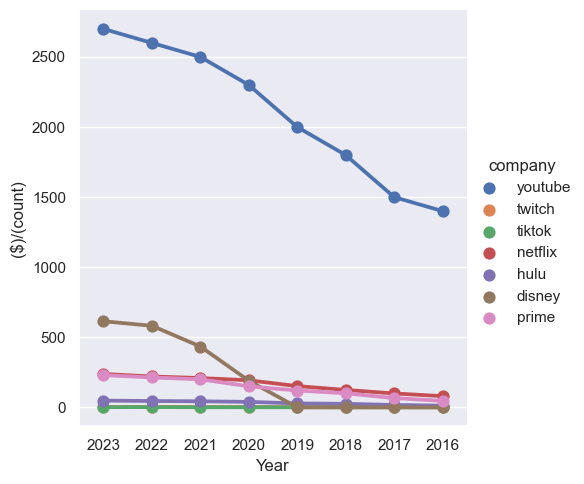

In [65]:
sns.catplot(x="Year",y="($)/(count)",kind="point",data=df_T_sub, hue="company")


In [113]:
df_T_revenue.head()


,Year,($)/(count),company,Permutation1
0,2023,8.4,disney,13.200
1,2023,33.7,netflix,3.100
2,2023,11.2,hulu,141.000
3,2023,2.8,twitch,19.772
4,2023,86.0,youtube,0.000


In [72]:
df_T_revenue = df_T_revenue.drop("type", axis = 1)

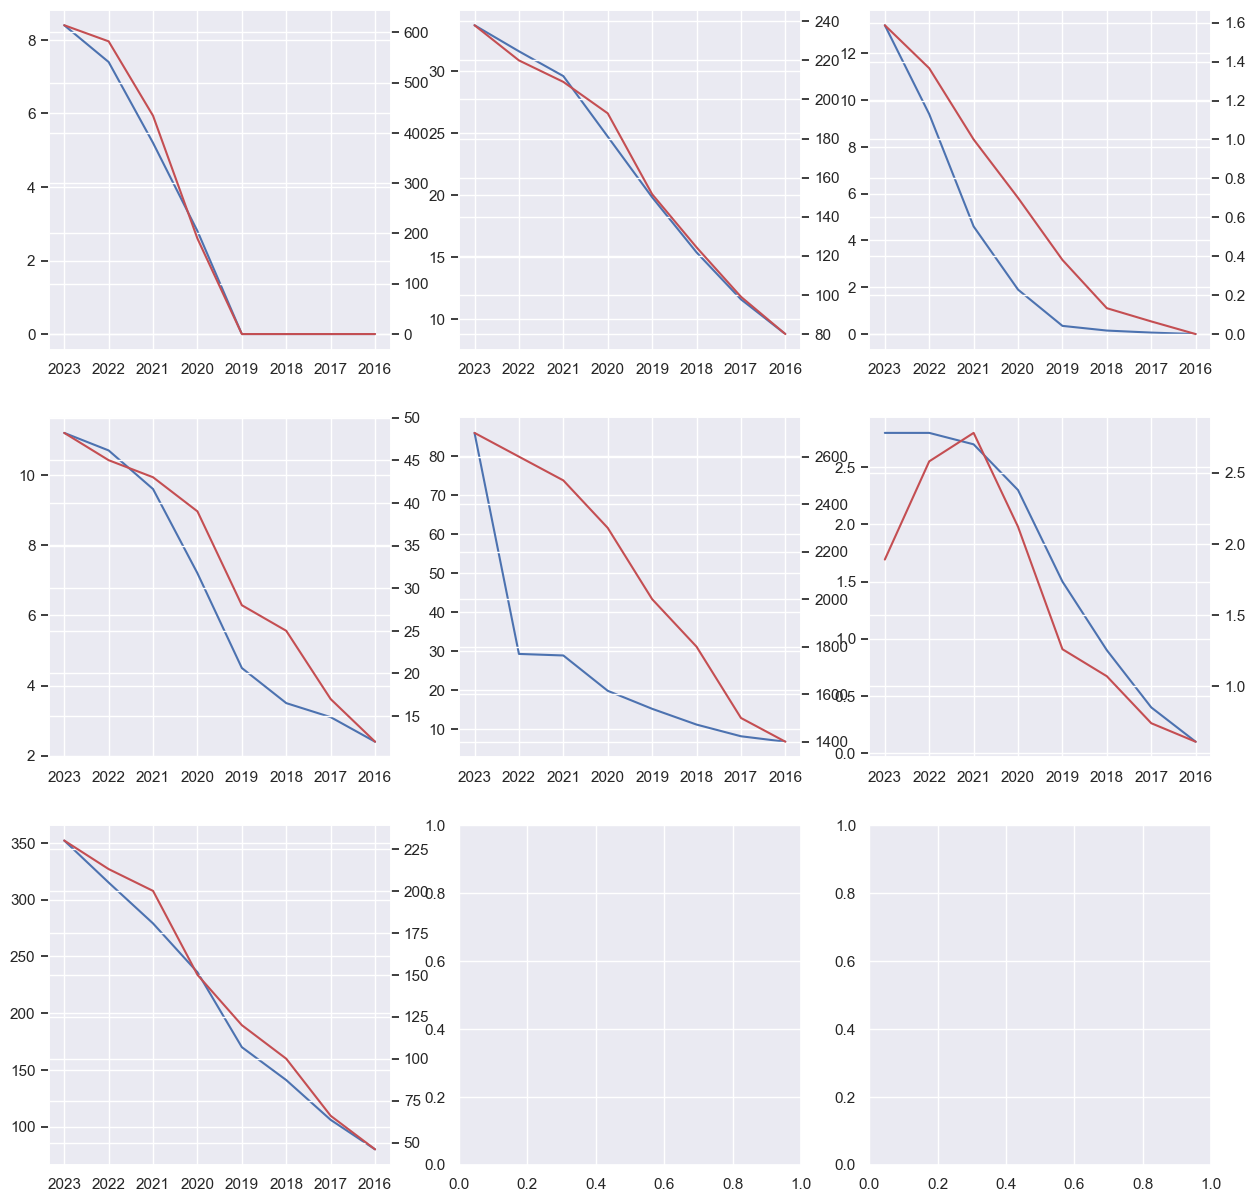

In [89]:
fig, ax = plt.subplots(3, 3)
ax[0,0].plot(df_T_revenue[df_T_revenue["company"]=='disney']["Year"], df_T_revenue[df_T_revenue["company"]=='disney']["($)/(count)"], color="b")
ax2 = ax[0,0].twinx()
ax2.plot(df_T_sub[df_T_sub["company"]=='disney']["Year"], df_T_sub[df_T_sub["company"]=='disney']["($)/(count)"], color="r")

ax[0,1].plot(df_T_revenue[df_T_revenue["company"]=='netflix']["Year"], df_T_revenue[df_T_revenue["company"]=='netflix']["($)/(count)"], color="b")
ax2 = ax[0,1].twinx()
ax2.plot(df_T_sub[df_T_sub["company"]=='netflix']["Year"], df_T_sub[df_T_sub["company"]=='netflix']["($)/(count)"], color="r")

ax[0,2].plot(df_T_revenue[df_T_revenue["company"]=='tiktok']["Year"], df_T_revenue[df_T_revenue["company"]=='tiktok']["($)/(count)"], color="b")
ax2 = ax[0,2].twinx()
ax2.plot(df_T_sub[df_T_sub["company"]=='tiktok']["Year"], df_T_sub[df_T_sub["company"]=='tiktok']["($)/(count)"], color="r")

ax[1,0].plot(df_T_revenue[df_T_revenue["company"]=='hulu']["Year"], df_T_revenue[df_T_revenue["company"]=='hulu']["($)/(count)"], color="b")
ax2 = ax[1,0].twinx()
ax2.plot(df_T_sub[df_T_sub["company"]=='hulu']["Year"], df_T_sub[df_T_sub["company"]=='hulu']["($)/(count)"], color="r")

ax[1,1].plot(df_T_revenue[df_T_revenue["company"]=='youtube']["Year"], df_T_revenue[df_T_revenue["company"]=='youtube']["($)/(count)"], color="b")
ax2 = ax[1,1].twinx()
ax2.plot(df_T_sub[df_T_sub["company"]=='youtube']["Year"], df_T_sub[df_T_sub["company"]=='youtube']["($)/(count)"], color="r")

ax[1,2].plot(df_T_revenue[df_T_revenue["company"]=='twitch']["Year"], df_T_revenue[df_T_revenue["company"]=='twitch']["($)/(count)"], color="b")
ax2 = ax[1,2].twinx()
ax2.plot(df_T_sub[df_T_sub["company"]=='twitch']["Year"], df_T_sub[df_T_sub["company"]=='twitch']["($)/(count)"], color="r")

ax[2,0].plot(df_T_revenue[df_T_revenue["company"]=='prime']["Year"], df_T_revenue[df_T_revenue["company"]=='prime']["($)/(count)"], color="b")
ax2 = ax[2,0].twinx()
ax2.plot(df_T_sub[df_T_sub["company"]=='prime']["Year"], df_T_sub[df_T_sub["company"]=='prime']["($)/(count)"], color="r")


plt.show()


**********************************************************************************************************************

Hypotheses:

Based on the above plots, it seems like # of subscribers and revenue generated are related positively. 

Null Hypothesis - Number of subscribers does not influence the revenue generated

We can calculate the p-value to see if this holds

**********************************************************************************************************************




In [93]:
df_T_revenue.groupby("company").describe()

($)/(count)                                                     \
              count        mean         std   min        25%       50%   
company                                                                  
disney          8.0    2.975250    3.573600   0.0    0.00000    1.4010   
hulu            8.0    6.525000    3.609412   2.4    3.40000    5.8500   
netflix         8.0   21.905000    9.448637   8.8   14.44250   22.2750   
prime           8.0  209.875000  100.500800  80.0  132.25000  203.0000   
tiktok          8.0    3.707875    5.036045   0.0    0.12825    1.1250   
twitch          8.0    1.687500    1.115396   0.1    0.77500    1.9000   
youtube         8.0   25.613625   25.881209   6.7   10.35000   17.4605   

                          
              75%    max  
company                   
disney     5.7500    8.4  
hulu       9.8750   11.2  
netflix   30.1000   33.7  
prime    288.0000  352.0  
tiktok     5.8000   13.2  
twitch     2.7250    2.8  
youtube   28.9445   86.0

In [98]:
df_T_sub.groupby("company").describe()

($)/(count)                                                         \
              count        mean         std      min        25%        50%   
company                                                                      
disney          8.0   227.48750  274.156761     0.00     0.0000    94.9500   
hulu            8.0    32.15000   13.581816    12.00    23.0000    33.5000   
netflix         8.0   164.32500   59.162627    79.90   117.9750   172.2000   
prime           8.0   140.62500   69.114682    46.00    91.5000   135.0000   
tiktok          8.0     0.65400    0.611774     0.00     0.1160     0.5405   
twitch          8.0     1.63125    0.829431     0.61     0.9875     1.5750   
youtube         8.0  2100.00000  501.426536  1400.00  1725.0000  2150.0000   

                              
               75%       max  
company                       
disney    471.0000   614.000  
hulu       43.5000    48.200  
netflix   211.7500   238.000  
prime     203.2500   230.000  
tiktok      1.0915     1.587  
twitch      2.2350     2.780  
youtube  2525.0000  2700.000

In [106]:
df_T_sub_series = df_T_sub.groupby("company")["($)/(count)"].agg(np.mean)
print(df_T_sub_series)
df_T_rev_series = df_T_revenue.groupby("company")["($)/(count)"].agg(np.mean)
print(df_T_rev_series)

company
disney      227.48750
hulu         32.15000
netflix     164.32500
prime       140.62500
tiktok        0.65400
twitch        1.63125
youtube    2100.00000
Name: ($)/(count), dtype: float64
company
disney       2.975250
hulu         6.525000
netflix     21.905000
prime      209.875000
tiktok       3.707875
twitch       1.687500
youtube     25.613625
Name: ($)/(count), dtype: float64


In [99]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]


In [107]:
r_obs = pearson_r(df_T_sub_series, df_T_rev_series)
print(r_obs)


-0.04581861879210807


In [110]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    sub_permuted = np.random.permutation(df_T_sub_series)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(sub_permuted, df_T_rev_series)

# Compute p-value: p
p = np.sum(perm_replicates >= (r_obs))/10000
print('p-val =', p)


p-val = 0.2172


[-0.05009308  0.7127059 ]


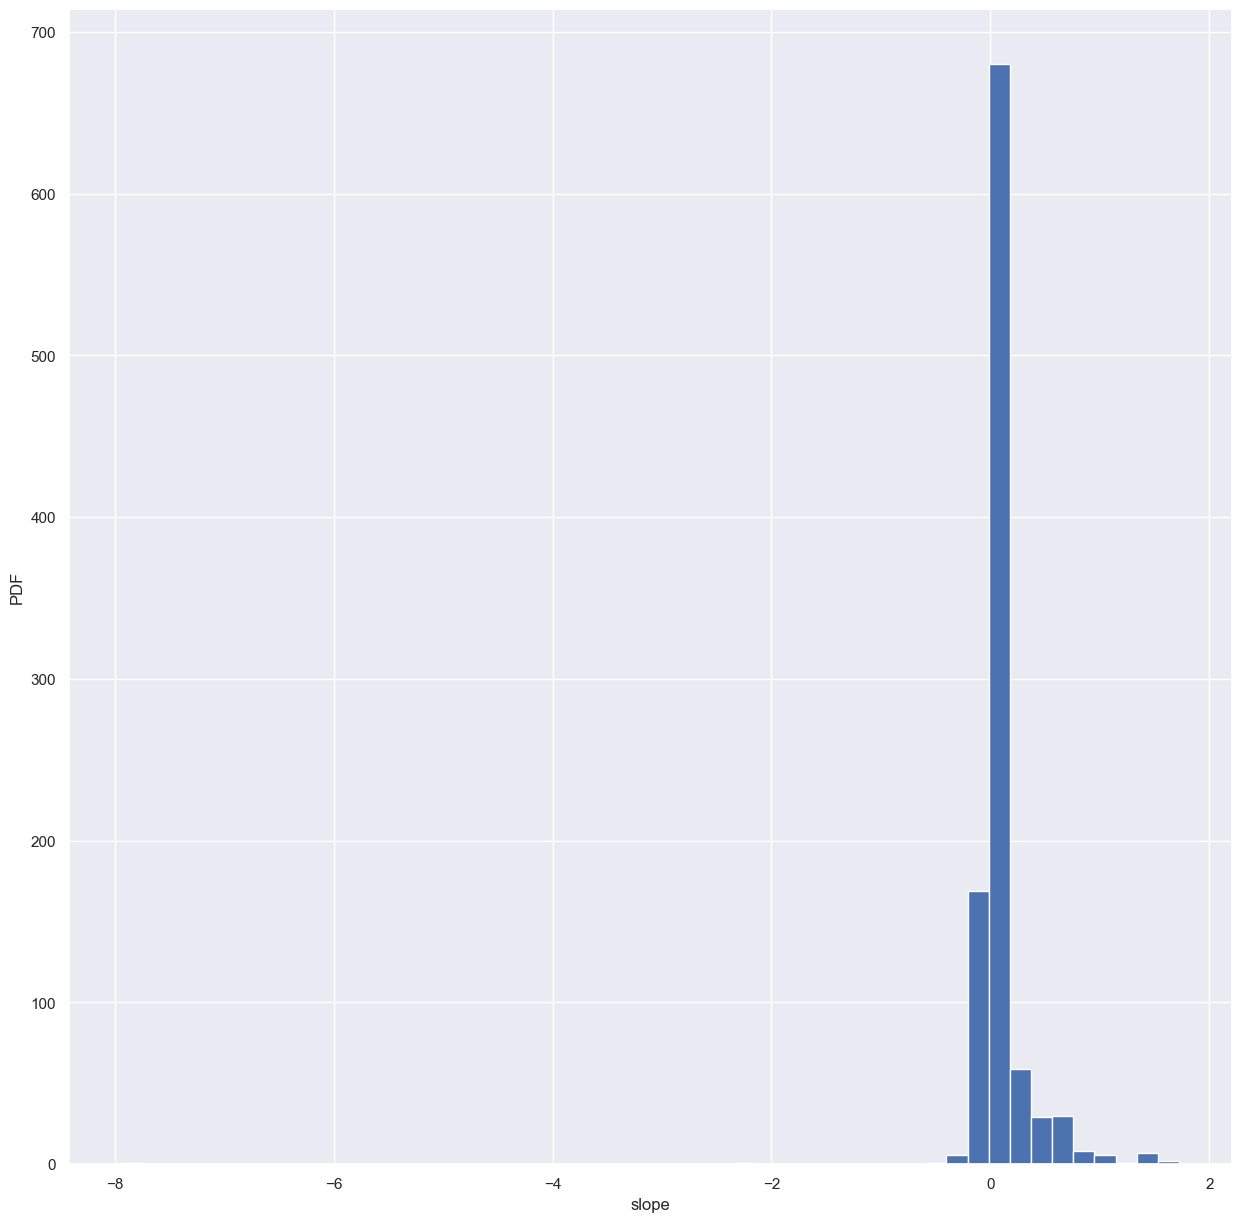

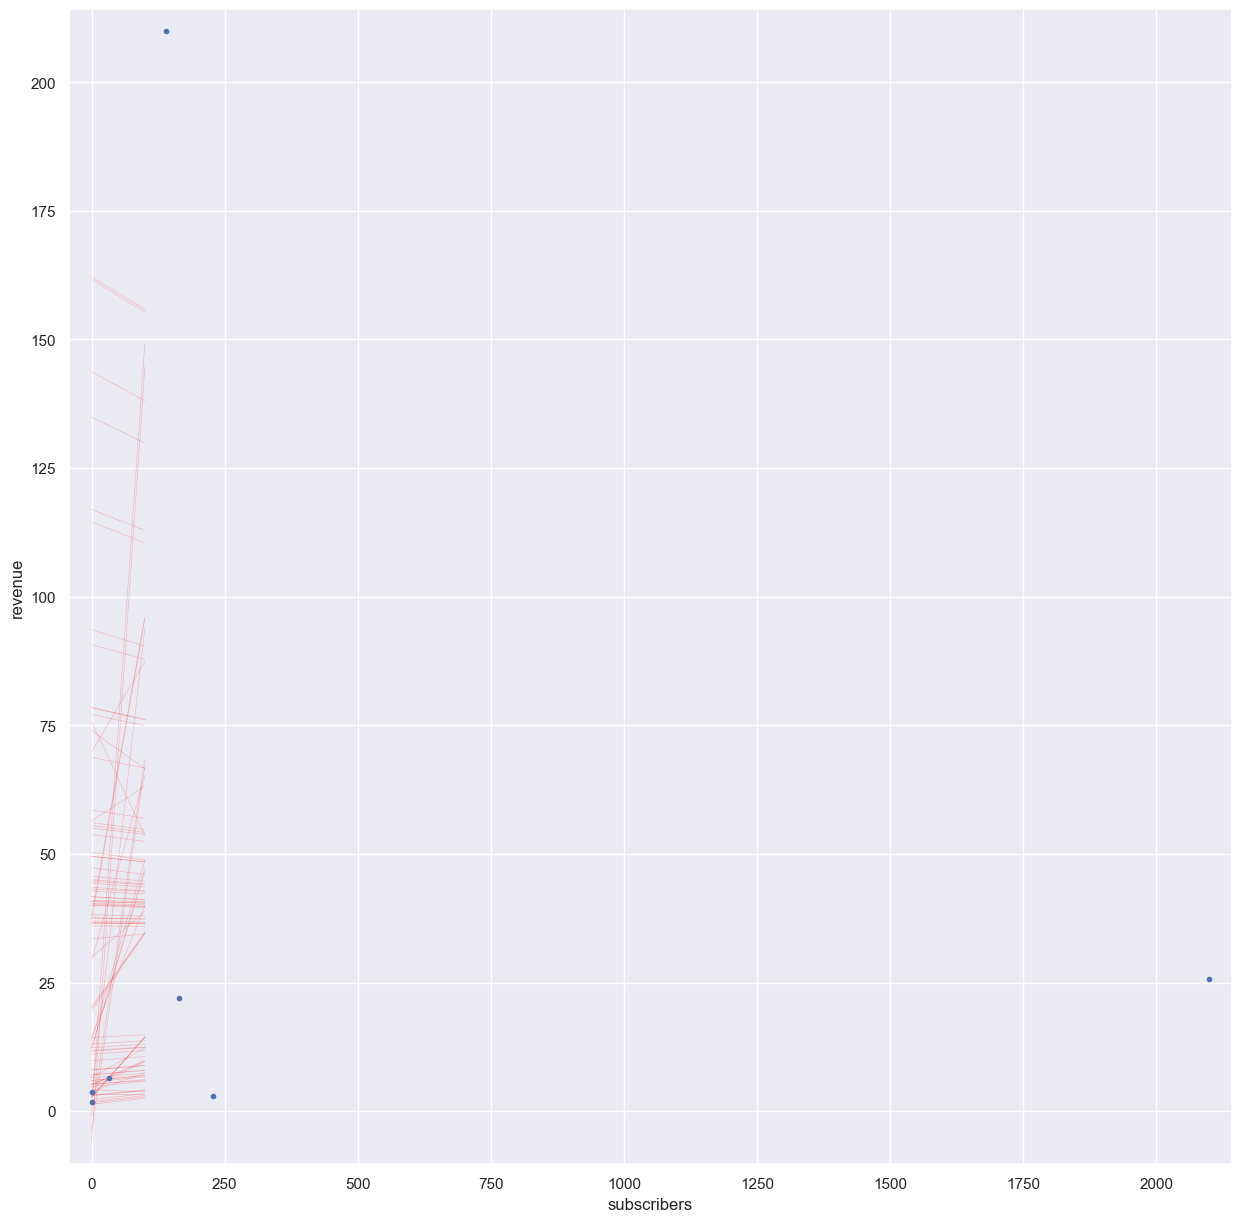

In [112]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps



# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df_T_sub_series, df_T_rev_series, 1000 )

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()


# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(df_T_sub_series,df_T_rev_series,marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('subscribers')
_ = plt.ylabel('revenue')
plt.margins(0.02)
plt.show()


Conclusion:

The p-value is very high and so we cannot reject the null. 
Also, the slope and intercept graph does not show strong correlation between the two variables. 

Assumption for our model:

The revenue listed is from various sources, especially for Amazon Prime, whose parent company is a conglomorate, unlike the other companies listed but much like our company XYZ.

This means XYZ should be safe to implement a new subscription model given its vast customer base and availability of original content. 

